<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Предобработка-и-исследовательский-анализ-данных" data-toc-modified-id="Предобработка-и-исследовательский-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка и исследовательский анализ данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li></ul></div>

# Защита персональных данных клиентов

Разработка метода преобразования данных с целью защиты персональных данных клиентов страховой компании и обоснование корректности его работы. 
Важно, чтобы при преобразовании качество моделей машинного обучения не ухудшилось.
В задании необходимо ответить на вопрос:
1. Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

Импорт необходимых библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

Открываем файлы и сохраняем данные в датафреймы

In [2]:
df = pd.read_csv('/datasets/insurance.csv')

## Предобработка и исследовательский анализ данных

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [4]:
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [5]:
df['Пол'].value_counts()

0    2505
1    2495
Name: Пол, dtype: int64

* Данные корректные

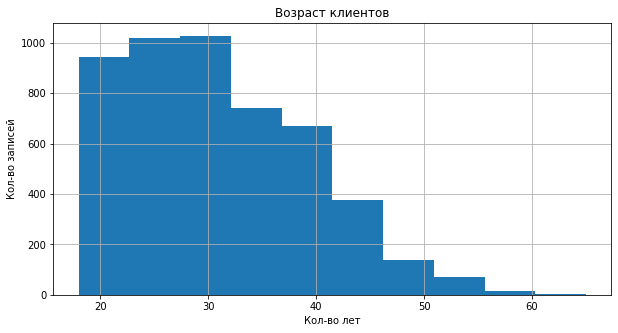

In [6]:
df['Возраст'].hist(figsize=(10, 5), grid=True)
plt.xlabel("Кол-во лет")
plt.ylabel("Кол-во записей")
plt.title("Возраст клиентов")
plt.show()    

* Данные корректные

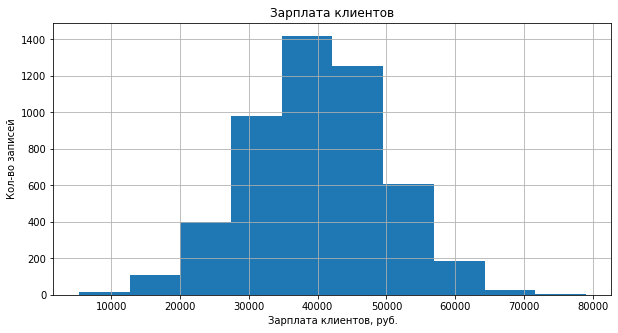

In [7]:
df['Зарплата'].hist(figsize=(10, 5), grid=True)
plt.xlabel("Зарплата клиентов, руб.")
plt.ylabel("Кол-во записей")
plt.title("Зарплата клиентов")
plt.show()    

* Данные корректные

In [8]:
df['Члены семьи'].value_counts()

1    1814
0    1513
2    1071
3     439
4     124
5      32
6       7
Name: Члены семьи, dtype: int64

* Данные корректные

In [9]:
df['Страховые выплаты'].value_counts()

0    4436
1     423
2     115
3      18
4       7
5       1
Name: Страховые выплаты, dtype: int64

* Данные корректные

Проверим данные на наличие пропусков

In [10]:
print('Количество пропусков в каждом столбце') 
print(df.isna().mean())

Количество пропусков в каждом столбце
Пол                  0.0
Возраст              0.0
Зарплата             0.0
Члены семьи          0.0
Страховые выплаты    0.0
dtype: float64


* Пропуски не обнаружены

**Вывод**

* Данные подготовленны, можно переходить к следующему этапу


## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Вопрос:** Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? 

**Ответ:**  Не изменится

**Обоснование:** <br>

Умножим матрицу $X$ на обратимую матрицу $P$ и вычислим, чему будет равно предсказание и вектор весов. Для вычисления будет использовать следующие свойства обратной, транспонированной матрицы и единичной матрица: 

$$(AB)^{-1} = B^{-1} A^{-1}$$

$$(AB)^T = B^T A^T$$

$$AE = EA = A$$

$$AA^{-1} = A^{-1}A = E$$


Произведём вычисления:

$$
a_1 = XP w_1 = XP ((XP)^T (XP))^{-1} (XP)^T y = XP (P^T X^T XP)^{-1} P^T X^T y = XP ((P^T (X^T X))P)^{-1} P^T X^T y = XP P^{-1} (P^T(X^T X))^{-1} P^T X^T y = XE (X^T X)^{-1} (P^T)^{-1} P^T X^T y = X (X^T X)^{-1} E X^T y = X(X^T X)^{-1} X^T y = Xw = a
$$

**Вывод:** Значение предсказания $a$ не меняется, если умножать матрицу признаков на обратимую матрицу.

## Алгоритм преобразования

**Алгоритм**

Для защиты информации будем умножать матрицу признаков на обратимую матрицу $P$, которая будет генерироваться случайным образом.

**Обоснование**

При умножении матрицы признаков на случайную обратимую матрицу P, мы зашифруем данные, при этом значения предсказаний не изменяться (см. доказательство в пункте 3), и, следовательно, не ухудшится качество модели.

## Проверка алгоритма

Извелекём из выборок признаки и целевой признак

In [11]:
features = df.drop('Страховые выплаты', axis=1)
target = df['Страховые выплаты']

Разобьём выборки на обучающую и валидационную

In [12]:
features_train, features_test, target_train, target_test = \
    train_test_split(features, target, test_size=0.25, random_state=12345)

In [13]:
print(f'Итоговые размеры выборок , обучающая:валидационная - '
      f'{target_train.count()}:{target_test.count()}')

Итоговые размеры выборок , обучающая:валидационная - 3750:1250


Обучим модель, выведем на экран оценку качества модели (метрику R2) и коэфициенты линейной регрессии

In [14]:
model = LinearRegression()
model.fit(features_train, target_train)
prediction = model.predict(features_test)
R2_origin = r2_score(target_test, prediction)
print(f'R2 = {R2_origin:.5f}')
print('w-vector coef', model.coef_)

R2 = 0.43523
w-vector coef [ 1.79258369e-02  3.57228278e-02 -5.46000708e-07 -1.26186590e-02]


Напишем функцию, которая создаёт рандомную обратимую матрицу и умножает матрицу признаков на созданную рандомную матрицу

In [15]:
def cipher_features(features):
    det = 0
    while det == 0:
        np.random.seed(42)
        random_matrix = np.random.normal(size=(features.shape[1], features.shape[1]))
        det = np.linalg.det(random_matrix)
    return features @ random_matrix

In [16]:
cipher_matrix = cipher_features(features)
print('Исходная матрица признаков:')
display(features.head())
print('Зашифрованная матрица признаков:')
display(cipher_matrix.head())

Исходная матрица признаков:


,Пол,Возраст,Зарплата,Члены семьи
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0


Зашифрованная матрица признаков:


,0,1,2,3
0,-23294.791154,26899.327002,-22921.847067,-23067.770211
1,-17850.555758,20604.598076,-17538.953455,-17662.990926
2,-9865.752553,11386.970944,-9685.974377,-9758.069218
3,-19581.515190,22616.010381,-19294.804157,-19405.939170
4,-12259.341053,14154.123038,-12050.336135,-12132.535366


* Данные зашифрованы

Разобьём зашифрованную матрицу признаков на обучающую и валидационную выборку

In [17]:
features_cipher_train, features_ciphe_test = \
    train_test_split(cipher_matrix, test_size=0.25, random_state=12345)
print(f'Итоговые размеры выборок , обучающая:валидационная - '
      f'{features_cipher_train.shape[0]}:{features_ciphe_test.shape[0]}')

Итоговые размеры выборок , обучающая:валидационная - 3750:1250


Обучем модель на новых данных

In [18]:
model.fit(features_cipher_train, target_train)
prediction_cipher = model.predict(features_ciphe_test)
R2_cipher = r2_score(target_test, prediction_cipher)
print(f'R2 = {R2_cipher:.5f}')
print('w-vector coef', model.coef_)

R2 = 0.43523
w-vector coef [-0.0368379  -0.00933469  0.00583404  0.02045557]


Произведём сравнение качества моделей до и после преобразования

In [19]:
result = pd.DataFrame(data= [R2_origin, R2_cipher], 
                     columns=['R2'], 
                     index=['Линейная регрессия с исходными данными',
                            'Линейная регрессия на преобразованных признаках',])
result

,R2
Линейная регрессия с исходными данными,0.435228
Линейная регрессия на преобразованных признаках,0.435228


**Вывод**
* Качество линейной регресии не изменилось от использования исходной матрицы, умноженную на обратимую;
* Данный метод можно использовать для шифрования данных.